In [2]:
using Pkg
using Conda
using WebIO
using Interact
using DifferentialEquations
using DiffEqFlux
using DiffEqSensitivity, OrdinaryDiffEq, Zygote
using Plots
using Lux, Optim, Test
using Optimization, OptimizationPolyalgorithms

using BifurcationKit
using Revise
using SparseArrays, LinearAlgebra, DiffEqOperators, Setfield, Parameters
using GaussianProcesses
using Distributions,Random
using ForwardDiff
using MAT
using CSV
using DataFrames

using DataDrivenDiffEq
using ModelingToolkit
using Surrogates,SurrogatesAbstractGPs
using ReservoirComputing

gr()

Plots.GRBackend()

In [52]:
using Random
using LaTeXStrings

In [3]:
function Duffing(u,p,t)
    b,alpha_2,mu,v,rho,delta_st,wn_2,Phi,w = p
    x,y = u
    du1 = y
    du2 = -b*y - alpha_2*x - mu*x^3 - v*x^5 - rho*x^7 + delta_st * wn_2 *Phi * cos(w*t)
    du = [du1,du2]
end

function Duffing_Approx(u,p,t)
    b,alpha_2,mu,v,rho,delta_st,wn_2,Phi,w = p
    x,y = u
    du1 = y
    #there is no v and rho
    du2 = -b*y - alpha_2*x - mu*x^3 + delta_st * wn_2 *Phi * cos(w*t)
    du = [du1,du2]
end

Duffing_Approx (generic function with 1 method)

In [19]:
initial_1 = [1.0,0.0]
datasize_1 = 100
timespan_1 = (0.0,10.0)
t_1 = range(timespan_1[1],timespan_1[2],length=datasize_1)
#param_1 = [0.3159,1.0,1.499,-0.3921,0.0422,1.0,1.0,1.0,round(2*pi*19.95,digits = 3)]
param_1 = [0.3159,1.0,1.499,-1.0,0.0422,1.0,1.0,1.0,round(2*pi*19.95,digits = 3)]
prob_Duffing = ODEProblem(Duffing,initial_1,timespan_1,param_1)
sol_Duffing = solve(prob_Duffing,Tsit5(),saveat=t_1)

prob_Duffing_A = ODEProblem(Duffing_Approx,initial_1,timespan_1,param_1)
sol_Duffing_A = solve(prob_Duffing_A,Tsit5(),saveat=t_1)

retcode: Success
Interpolation: 1st order linear
t: 100-element Vector{Float64}:
  0.0
  0.10101010101010101
  0.20202020202020202
  0.30303030303030304
  0.40404040404040403
  0.5050505050505051
  0.6060606060606061
  0.7070707070707071
  0.8080808080808081
  0.9090909090909091
  1.0101010101010102
  1.1111111111111112
  1.2121212121212122
  ⋮
  8.88888888888889
  8.98989898989899
  9.090909090909092
  9.191919191919192
  9.292929292929292
  9.393939393939394
  9.494949494949495
  9.595959595959595
  9.696969696969697
  9.797979797979798
  9.8989898989899
 10.0
u: 100-element Vector{Vector{Float64}}:
 [1.0, 0.0]
 [0.9874420094850455, -0.24525146234805345]
 [0.9509735000887743, -0.4698681937094885]
 [0.8932908459632508, -0.6665801745179659]
 [0.8174725588607852, -0.8209724932393747]
 [0.7277666974091794, -0.9420796560976789]
 [0.6278170132205998, -1.0255293261984677]
 [0.5208287187448493, -1.077304156832738]
 [0.4099156024158477, -1.1059117271168128]
 [0.2972659004668266, -1.1092770791

In [20]:
t_5 = range(timespan_1[1],timespan_1[2],length=5)
t_10 = range(timespan_1[1],timespan_1[2],length=10)
t_15 = range(timespan_1[1],timespan_1[2],length=15)
t_30 = range(timespan_1[1],timespan_1[2],length=30)
t_45 = range(timespan_1[1],timespan_1[2],length=45)
t_true = range(timespan_1[1],timespan_1[2],length=1000)


prob_Duffing = ODEProblem(Duffing,initial_1,timespan_1,param_1)
sol_Duffing_5 = solve(prob_Duffing,Tsit5(),saveat=t_5)
sol_Duffing_10 = solve(prob_Duffing,Tsit5(),saveat=t_10)
sol_Duffing_15 = solve(prob_Duffing,Tsit5(),saveat=t_15)
sol_Duffing_30 = solve(prob_Duffing,Tsit5(),saveat=t_30)
sol_Duffing_45 = solve(prob_Duffing,Tsit5(),saveat=t_45)
sol_Duffing_true = solve(prob_Duffing,Tsit5(),saveat=t_true)

timespan_2 = (0,12)
prob_Duffing_2 = ODEProblem(Duffing,initial_1,(0,12),param_1)
t_true_12 = range(timespan_2[1],timespan_2[2],length = 1201)
sol_Duffing_true_12 = solve(prob_Duffing_2,Tsit5(),saveat=t_true_12)

retcode: Success
Interpolation: 1st order linear
t: 1201-element Vector{Float64}:
  0.0
  0.01
  0.02
  0.03
  0.04
  0.05
  0.06
  0.07
  0.08
  0.09
  0.1
  0.11
  0.12
  ⋮
 11.89
 11.9
 11.91
 11.92
 11.93
 11.94
 11.95
 11.96
 11.97
 11.98
 11.99
 12.0
u: 1201-element Vector{Vector{Float64}}:
 [1.0, 0.0]
 [0.9999667595780697, -0.00782197402021255]
 [0.9998069919279216, -0.0260330774977596]
 [0.9994234558327589, -0.05067826221078608]
 [0.998816115898468, -0.06888183587173323]
 [0.9980829112036719, -0.07654716032492938]
 [0.9972856617017324, -0.08403410435993175]
 [0.9963657379528157, -0.1018317869292094]
 [0.9952255710429456, -0.12623434591712035]
 [0.9938637173285196, -0.14427639588899943]
 [0.9923780237394543, -0.15172371358580614]
 [0.9908299849107354, -0.15887739409042176]
 [0.9891636336343137, -0.17624414174076486]
 ⋮
 [0.1628084652113291, -0.06878422631369555]
 [0.16210600059788952, -0.07347157270625666]
 [0.16131610466220944, -0.08437709519975428]
 [0.16044548349176466, -0.08

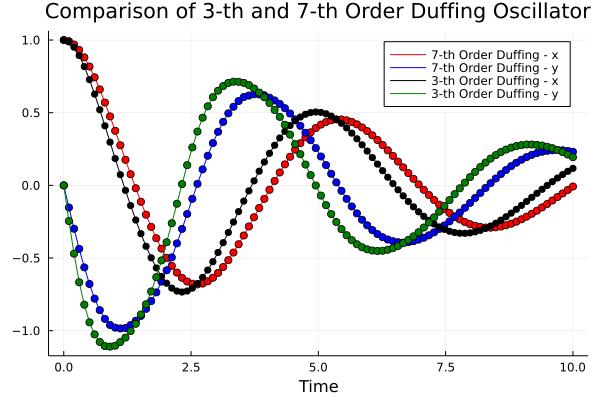

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [25]:
plot1 = plot()
plot!(plot1,t_1,Array(sol_Duffing[1,:]),color = "red",label = "7-th Order Duffing - x")
scatter!(plot1,t_1,Array(sol_Duffing[1,:]),color = "red",label = "")
plot!(plot1,t_1,Array(sol_Duffing[2,:]),color = "blue",label = "7-th Order Duffing - y")
scatter!(plot1,t_1,Array(sol_Duffing[2,:]),color = "blue",label = "",title = "Comparison")


plot!(plot1,t_1,Array(sol_Duffing_A[1,:]),color = "black",label = "3-th Order Duffing - x")
scatter!(plot1,t_1,Array(sol_Duffing_A[1,:]),color = "black",label = "")
plot!(plot1,t_1,Array(sol_Duffing_A[2,:]),color = "green",label = "3-th Order Duffing - y")
scatter!(plot1,t_1,Array(sol_Duffing_A[2,:]),color = "green",label = "",title = "Comparison of 3-th and 7-th Order Duffing Oscillator")
xlabel!("Time")

In [26]:
savefig(plot1,"C:/Users/周天恒/Desktop/课程/英国布里斯托/Bristol课程/DSP/Duffing")

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


## PINN

In [132]:
random_positions = [10rand() for i in 1:100] 
x_value = round.(random_positions,digits = 1)
random_position_value = Array(sol_Duffing_A)[1,convert.(Int64,round.(random_positions,digits = 1).*10)]

100-element Vector{Float64}:
 -0.027176228834302128
  0.1609870021862118
 -0.2605911987462785
  0.48916256618994836
  0.2972659004668266
 -0.26516204465823884
 -0.673156978195777
 -0.2159410150760437
 -0.23823369014041454
 -0.6267391380265555
  0.23599323976080022
  0.07380358360328254
 -0.3290721432645929
  ⋮
 -0.11084036151650964
 -0.32673489472813255
 -0.2796656022213592
  0.1464342075302654
 -0.675539997289157
  0.23599323976080022
 -0.23923438386468257
  0.4099156024158477
  0.27594709165455683
 -0.23923438386468257
 -0.2605911987462785
  0.4099156024158477

In [625]:
NNODE = Flux.Chain(x -> [x],
           Flux.Dense(1,4,tanh),
           Flux.Dense(4,8,tanh),
           Flux.Dense(8,1),
           first)



g(t) = t*NNODE(t) + initial_1[1]
ϵ = sqrt(eps(Float32))

loss() =  mean(([(g(t+ϵ)-g(t))/ϵ for t in t_5] .- sol_Duffing_5[2,:]).^2) + 0* mean(([g.(x) for x in x_value] .- random_position_value).^2 )

#+ 0.1* mean((NNODE.(t_1) .- sol_Duffing[1,:]).^2)

opt = Flux.Adam(0.1)
data = Iterators.repeated((), 1000)
iter = 0
cb = function () #callback function to observe training
  global iter += 1
  if iter % 50 == 0
    display(loss())
  end
end
display(loss())
Flux.train!(loss, Flux.params(NNODE), data, opt; cb=cb)


0.3398582264230786

0.04028935190363769

0.03499396446456501

0.034712303063668834

0.03466665653618607

0.03464481837492167

0.03463194394887822

0.03462342176792678

0.03461741390469774

0.03461272112705834

0.03460892123600545

0.0346055261815907

0.034602096844840204

0.0345978186375344

0.03458990013023177

0.03455350820957694

0.04724548009042064

0.028062202552193095

0.027049205243002684

0.026558307475298432

0.028212735030036185

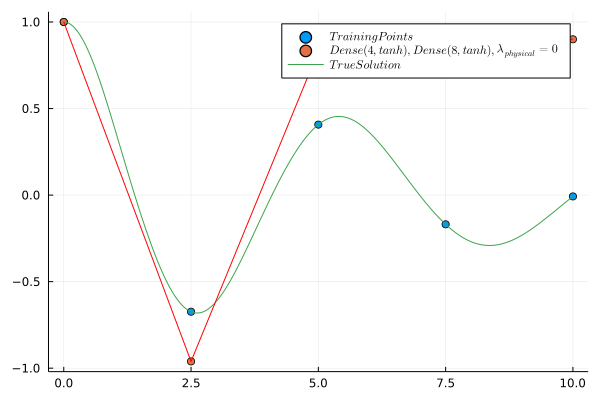

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [628]:
pinn_5_1 = plot()
scatter!(pinn_5_1,t_5,sol_Duffing_5[1,:],label = L"$Training Points$")
scatter!(pinn_5_1,t_5,g.(t_5),label =  L"$Dense(4,tanh),Dense(8,tanh),   $"* L"$\lambda _{physical} = 0$")
plot!(pinn_5_1,t_true,Array(sol_Duffing_true)[1,:],label = L"$True Solution$")
plot!(pinn_5_1,t_5,g.(t_5),label = "",color = "red")
#xlabel!(pinn_1,"Time")

In [632]:
NNODE = Flux.Chain(x -> [x],
           Flux.Dense(1,4,tanh),
           Flux.Dense(4,8,tanh),
           Flux.Dense(8,1),
           first)


g(t) = t*NNODE(t) + initial_1[1]
ϵ = sqrt(eps(Float32))

loss() =  mean(([(g(t+ϵ)-g(t))/ϵ for t in t_5] .- sol_Duffing_5[2,:]).^2) + 1* mean(([g.(x) for x in x_value] .- random_position_value).^2 )

#+ 0.1* mean((NNODE.(t_1) .- sol_Duffing[1,:]).^2)

opt = Flux.Adam(0.1)
data = Iterators.repeated((), 500)
iter = 0
cb = function () #callback function to observe training
  global iter += 1
  if iter % 50 == 0
    display(loss())
  end
end
display(loss())
Flux.train!(loss, Flux.params(NNODE), data, opt; cb=cb)


41.54474066155807

0.37494649142891745

0.12115603052300866

0.06773730771343105

0.06614019791536571

0.06592490924619968

0.0659182656400953

0.06591521876254897

0.06591184014769091

0.06590823479062821

0.06590433790640673

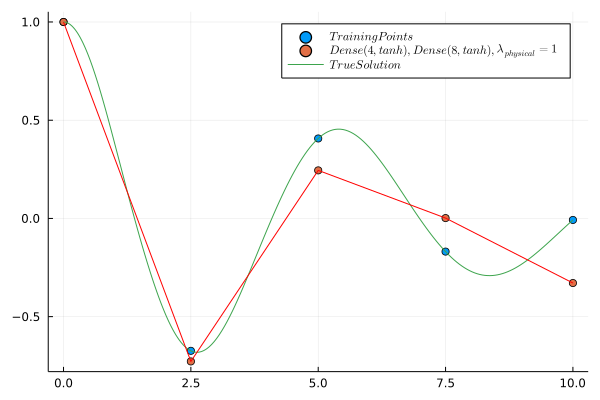

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [633]:
pinn_5_2 = plot()
scatter!(pinn_5_2,t_5,sol_Duffing_5[1,:],label = L"$Training Points$")
scatter!(pinn_5_2,t_5,g.(t_5),label =  L"$Dense(4,tanh),Dense(8,tanh),   $"* L"$\lambda _{physical} = 1$")
plot!(pinn_5_2,t_true,Array(sol_Duffing_true)[1,:],label = L"$True Solution$")
plot!(pinn_5_2,t_5,g.(t_5),label = "",color = "red")

In [638]:
NNODE = Flux.Chain(x -> [x],
           Flux.Dense(1,4,tanh),
           Flux.Dense(4,8,tanh),
           Flux.Dense(8,1),
           first)



g(t) = t*NNODE(t) + initial_1[1]
ϵ = sqrt(eps(Float32))

loss() =  mean(([(g(t+ϵ)-g(t))/ϵ for t in t_5] .- sol_Duffing_5[2,:]).^2) + 10* mean(([g.(x) for x in x_value] .- random_position_value).^2 )

#+ 0.1* mean((NNODE.(t_1) .- sol_Duffing[1,:]).^2)

opt = Flux.Adam(0.1)
data = Iterators.repeated((), 500)
iter = 0
cb = function () #callback function to observe training
  global iter += 1
  if iter % 50 == 0
    display(loss())
  end
end
display(loss())
Flux.train!(loss, Flux.params(NNODE), data, opt; cb=cb)

409.09446943306716

2.0101935440140077

0.8373676514123709

0.5448715884676325

0.385943534137356

0.3274900250740617

0.3003697779928992

0.28340060085415936

0.2721094645241438

0.26475351446834394

0.2601812115839186

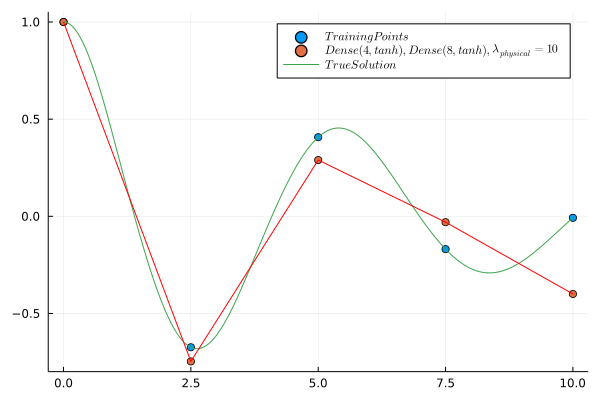

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [639]:
pinn_5_3 = plot()
scatter!(pinn_5_3,t_5,sol_Duffing_5[1,:],label = L"$Training Points$")
scatter!(pinn_5_3,t_5,g.(t_5),label =  L"$Dense(4,tanh),Dense(8,tanh),   $"* L"$\lambda _{physical} = 10$")
plot!(pinn_5_3,t_true,Array(sol_Duffing_true)[1,:],label = L"$True Solution$")
plot!(pinn_5_3,t_5,g.(t_5),label = "",color = "red")

In [646]:
NNODE = Flux.Chain(x -> [x],
           Flux.Dense(1,4,tanh),
           Flux.Dense(4,8,tanh),
           Flux.Dense(8,1),
           first)



g(t) = t*NNODE(t) + initial_1[1]
ϵ = sqrt(eps(Float32))

loss() =  mean(([(g(t+ϵ)-g(t))/ϵ for t in t_10] .- sol_Duffing_10[2,:]).^2) + 0* mean(([g.(x) for x in x_value] .- random_position_value).^2 )

#+ 0.1* mean((NNODE.(t_1) .- sol_Duffing[1,:]).^2)

opt = Flux.Adam(0.1)
data = Iterators.repeated((), 500)
iter = 0
cb = function () #callback function to observe training
  global iter += 1
  if iter % 50 == 0
    display(loss())
  end
end
display(loss())
Flux.train!(loss, Flux.params(NNODE), data, opt; cb=cb)

0.13459088954148765

0.0370641281915173

0.034252421608739154

0.03429474752523069

0.03187655498582817

0.030488207813782326

0.02950191231403384

0.028680395814433778

0.028044868005082067

0.02757160050941203

0.027241777659209987

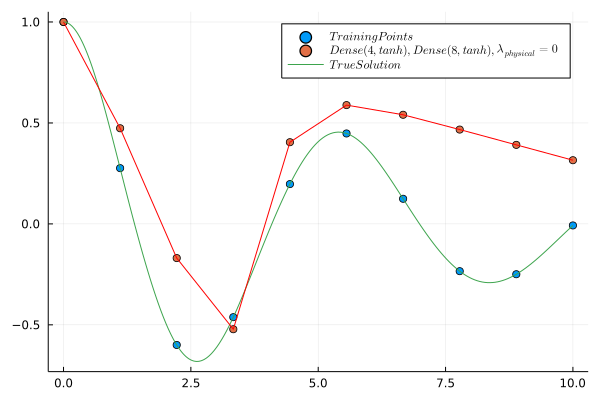

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [647]:
pinn_10_1 = plot()
scatter!(pinn_10_1,t_10,sol_Duffing_10[1,:],label = L"$Training Points$")
scatter!(pinn_10_1,t_10,g.(t_10),label =  L"$Dense(4,tanh),Dense(8,tanh),   $"* L"$\lambda _{physical} = 0$")
plot!(pinn_10_1,t_true,Array(sol_Duffing_true)[1,:],label = L"$True Solution$")
plot!(pinn_10_1,t_10,g.(t_10),label = "",color = "red")

In [648]:
NNODE = Flux.Chain(x -> [x],
           Flux.Dense(1,4,tanh),
           Flux.Dense(4,8,tanh),
           Flux.Dense(8,1),
           first)



g(t) = t*NNODE(t) + initial_1[1]
ϵ = sqrt(eps(Float32))

loss() =  mean(([(g(t+ϵ)-g(t))/ϵ for t in t_10] .- sol_Duffing_10[2,:]).^2) + 1* mean(([g.(x) for x in x_value] .- random_position_value).^2 )

#+ 0.1* mean((NNODE.(t_1) .- sol_Duffing[1,:]).^2)

opt = Flux.Adam(0.1)
data = Iterators.repeated((), 500)
iter = 0
cb = function () #callback function to observe training
  global iter += 1
  if iter % 50 == 0
    display(loss())
  end
end
display(loss())
Flux.train!(loss, Flux.params(NNODE), data, opt; cb=cb)

7.29207111937374

0.1522612872707516

0.0711087339640727

0.06737337513452225

0.06702095266274194

0.0666111327083489

0.09516124959158152

0.0633040212474041

0.06157563016231514

0.06131414794290622

0.061015487112492675

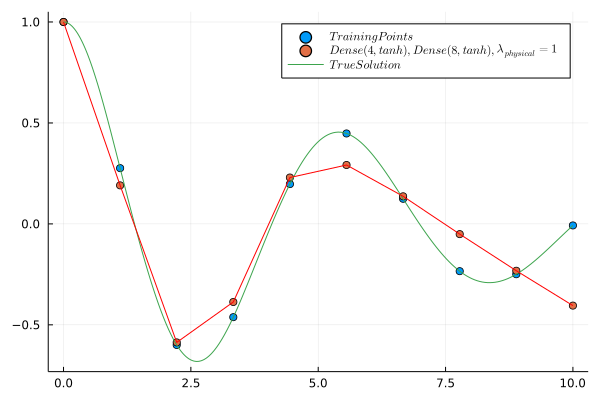

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [649]:
pinn_10_2 = plot()
scatter!(pinn_10_2,t_10,sol_Duffing_10[1,:],label = L"$Training Points$")
scatter!(pinn_10_2,t_10,g.(t_10),label =  L"$Dense(4,tanh),Dense(8,tanh),   $"* L"$\lambda _{physical} = 1$")
plot!(pinn_10_2,t_true,Array(sol_Duffing_true)[1,:],label = L"$True Solution$")
plot!(pinn_10_2,t_10,g.(t_10),label = "",color = "red")

In [656]:
NNODE = Flux.Chain(x -> [x],
           Flux.Dense(1,4,tanh),
           Flux.Dense(4,8,tanh),
           Flux.Dense(8,1),
           first)



g(t) = t*NNODE(t) + initial_1[1]
ϵ = sqrt(eps(Float32))

loss() =  mean(([(g(t+ϵ)-g(t))/ϵ for t in t_10] .- sol_Duffing_10[2,:]).^2) + 10* mean(([g.(x) for x in x_value] .- random_position_value).^2 )

#+ 0.1* mean((NNODE.(t_1) .- sol_Duffing[1,:]).^2)

opt = Flux.Adam(0.1)
data = Iterators.repeated((), 500)
iter = 0
cb = function () #callback function to observe training
  global iter += 1
  if iter % 50 == 0
    display(loss())
  end
end
display(loss())
Flux.train!(loss, Flux.params(NNODE), data, opt; cb=cb)

12.961279083433558

3.1706346601808355

3.0022831574304716

1.1651540133783307

2.056150500777714

0.44848416993625484

0.3793920668627896

0.3268801514360415

0.30523233441790926

0.29671944793487537

0.29255965695228486

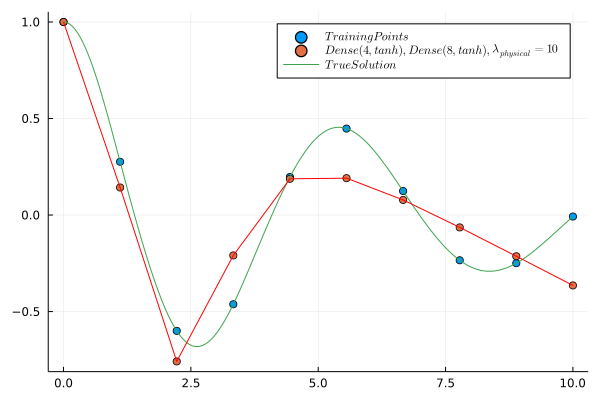

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [657]:
pinn_10_3 = plot()
scatter!(pinn_10_3,t_10,sol_Duffing_10[1,:],label = L"$Training Points$")
scatter!(pinn_10_3,t_10,g.(t_10),label =  L"$Dense(4,tanh),Dense(8,tanh),   $"* L"$\lambda _{physical} = 10$")
plot!(pinn_10_3,t_true,Array(sol_Duffing_true)[1,:],label = L"$True Solution$")
plot!(pinn_10_3,t_10,g.(t_10),label = "",color = "red")

In [662]:
NNODE = Flux.Chain(x -> [x],
           Flux.Dense(1,4,tanh),
           Flux.Dense(4,8,tanh),
           Flux.Dense(8,1),
           first)



g(t) = t*NNODE(t) + initial_1[1]
ϵ = sqrt(eps(Float32))

loss() =  mean(([(g(t+ϵ)-g(t))/ϵ for t in t_15] .- sol_Duffing_15[2,:]).^2) + 0* mean(([g.(x) for x in x_value] .- random_position_value).^2 )

#+ 0.1* mean((NNODE.(t_1) .- sol_Duffing[1,:]).^2)

opt = Flux.Adam(0.1)
data = Iterators.repeated((), 500)
iter = 0
cb = function () #callback function to observe training
  global iter += 1
  if iter % 50 == 0
    display(loss())
  end
end
display(loss())
Flux.train!(loss, Flux.params(NNODE), data, opt; cb=cb)

0.19653905833376795

0.038616278501079

0.03158423502387175

0.03119985220561825

0.030767077696736932

0.030262642744137928

0.0296683837477655

0.028930277191506933

0.028231834245626662

0.027924585697115614

0.027827200295187045

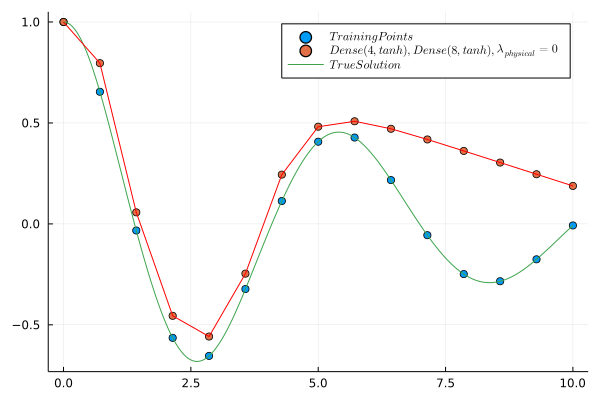

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [663]:
pinn_15_1 = plot()
scatter!(pinn_15_1,t_15,sol_Duffing_15[1,:],label = L"$Training Points$")
scatter!(pinn_15_1,t_15,g.(t_15),label =  L"$Dense(4,tanh),Dense(8,tanh),   $"* L"$\lambda _{physical} = 0$")
plot!(pinn_15_1,t_true,Array(sol_Duffing_true)[1,:],label = L"$True Solution$")
plot!(pinn_15_1,t_15,g.(t_15),label = "",color = "red")

In [664]:
NNODE = Flux.Chain(x -> [x],
           Flux.Dense(1,4,tanh),
           Flux.Dense(4,8,tanh),
           Flux.Dense(8,1),
           first)



g(t) = t*NNODE(t) + initial_1[1]
ϵ = sqrt(eps(Float32))

loss() =  mean(([(g(t+ϵ)-g(t))/ϵ for t in t_15] .- sol_Duffing_15[2,:]).^2) + 1* mean(([g.(x) for x in x_value] .- random_position_value).^2 )

#+ 0.1* mean((NNODE.(t_1) .- sol_Duffing[1,:]).^2)

opt = Flux.Adam(0.1)
data = Iterators.repeated((),500)
iter = 0
cb = function () #callback function to observe training
  global iter += 1
  if iter % 50 == 0
    display(loss())
  end
end
display(loss())
Flux.train!(loss, Flux.params(NNODE), data, opt; cb=cb)

3.4573938300954308

0.3477290834730715

0.09537757916337808

0.06941472786348471

0.06466244203133542

0.06330562699118329

0.06105020351917156

0.055788421074893964

0.047090703164185614

0.06847868356819718

0.06410838936810469

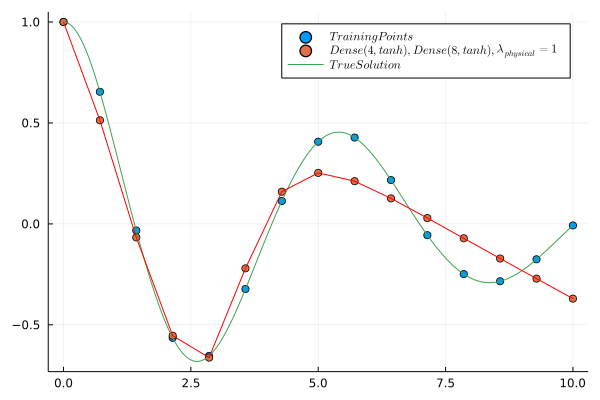

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [665]:
pinn_15_2 = plot()
scatter!(pinn_15_2,t_15,sol_Duffing_15[1,:],label = L"$Training Points$")
scatter!(pinn_15_2,t_15,g.(t_15),label =  L"$Dense(4,tanh),Dense(8,tanh),   $"* L"$\lambda _{physical} = 1$")
plot!(pinn_15_2,t_true,Array(sol_Duffing_true)[1,:],label = L"$True Solution$")
plot!(pinn_15_2,t_15,g.(t_15),label = "",color = "red")

In [666]:
NNODE = Flux.Chain(x -> [x],
           Flux.Dense(1,4,tanh),
           Flux.Dense(4,8,tanh),
           Flux.Dense(8,1),
           first)


g(t) = t*NNODE(t) + initial_1[1]
ϵ = sqrt(eps(Float32))

loss() =  mean(([(g(t+ϵ)-g(t))/ϵ for t in t_15] .- sol_Duffing_15[2,:]).^2) + 10* mean(([g.(x) for x in x_value] .- random_position_value).^2 )

#+ 0.1* mean((NNODE.(t_1) .- sol_Duffing[1,:]).^2)

opt = Flux.Adam(0.1)
data = Iterators.repeated((), 600)
iter = 0
cb = function () #callback function to observe training
  global iter += 1
  if iter % 50 == 0
    display(loss())
  end
end
display(loss())
Flux.train!(loss, Flux.params(NNODE), data, opt; cb=cb)

4.544701993818287

0.46911852967235745

0.32597979216220063

0.29614278553600126

0.2643556560625205

0.23490517561669114

0.2289235456768546

0.2258166985386974

0.22285653640115158

0.21991211466927438

0.21709740764842017

0.21455745688788025

0.21236675453813614

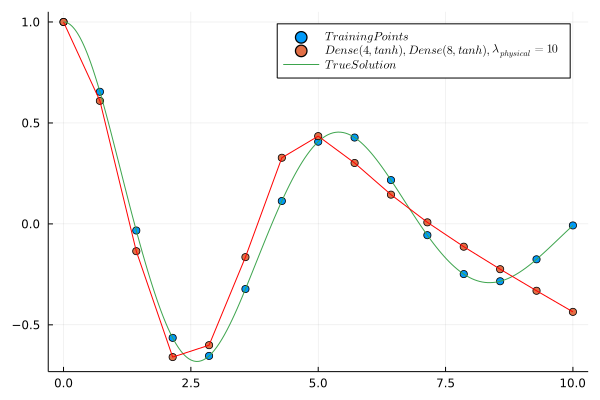

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [667]:
pinn_15_3 = plot()
scatter!(pinn_15_3,t_15,sol_Duffing_15[1,:],label = L"$Training Points$")
scatter!(pinn_15_3,t_15,g.(t_15),label =  L"$Dense(4,tanh),Dense(8,tanh),   $"* L"$\lambda _{physical} = 10$")
plot!(pinn_15_3,t_true,Array(sol_Duffing_true)[1,:],label = L"$True Solution$")
plot!(pinn_15_3,t_15,g.(t_15),label = "",color = "red")

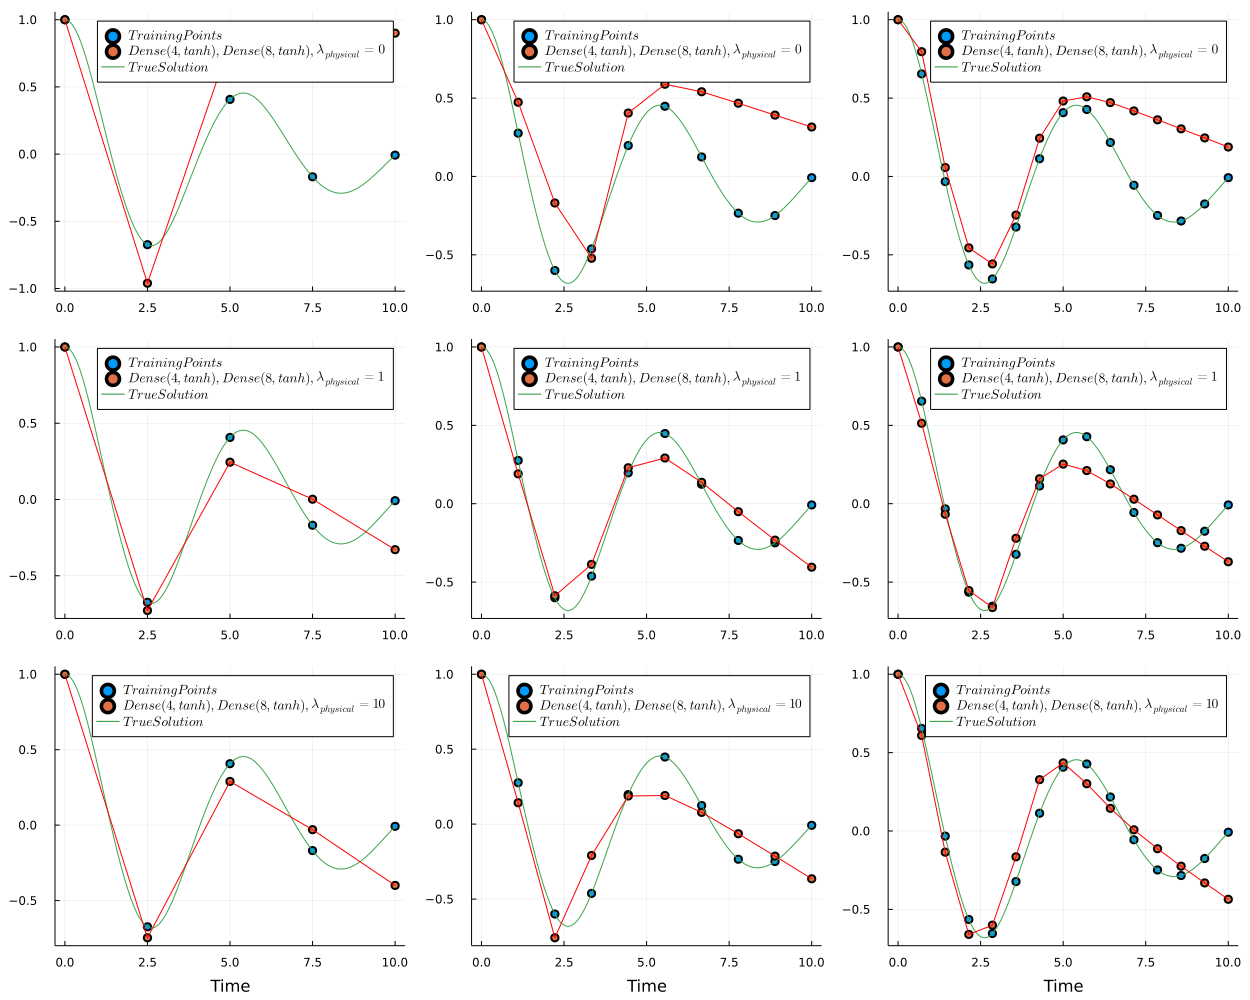

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [669]:
l = @layout [a b c;d e f;g h i]
p = plot(pinn_5_1,pinn_10_1,pinn_15_1,pinn_5_2,pinn_10_2,pinn_15_2,pinn_5_3,pinn_10_3,pinn_15_3,layout = grid(3,3),size = (1250,1000),legendfontsize = 9)

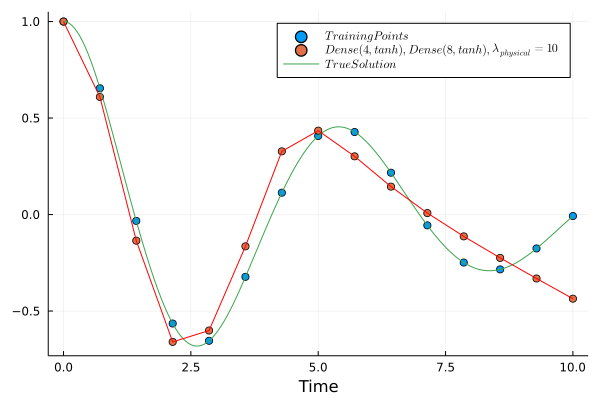

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [668]:
xlabel!(pinn_5_3,"Time")
xlabel!(pinn_10_3,"Time")
xlabel!(pinn_15_3,"Time")

In [670]:
savefig(p,"C:/Users/周天恒/Desktop/课程/英国布里斯托/Bristol课程/DSP/tanh4-tanh8")

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


## Duffing Electro

In [352]:
function Duffing_Electro(u,p,t)
    b,alpha_2,mu,v,rho,delta_st,wn_2,Phi,w,theta,R = p
    x,y,z = u
    du1 = y
    du2 = -b*y - alpha_2*x - mu*x^3 - v*x^5 - rho*x^7 - theta*z + delta_st * wn_2 *Phi * cos(w*t)
    du3 = theta*y-R*z
    du = [du1,du2,du3]
end



Duffing_Electro (generic function with 1 method)

In [362]:
initial_2 = [1.0,0.0,0.0]
datasize_2 = 10000
timespan_2 = (0.0,100.0)
t_2 = range(timespan_2[1],timespan_2[2],length=datasize_2)
param_2 = [0.3159,1.0,1.499,-1.0,0.0422,1.0,1.0,100.0,round(2*pi*19.95,digits = 3),4.5,12.5]
prob_Duffing_2 = ODEProblem(Duffing_Electro,initial_2,timespan_2,param_2)
sol_Duffing_2 = solve(prob_Duffing_2,TRBDF2(),saveat=t_2)


retcode: Success
Interpolation: 1st order linear
t: 10000-element Vector{Float64}:
   0.0
   0.010001000100010001
   0.020002000200020003
   0.030003000300030003
   0.040004000400040006
   0.05000500050005
   0.060006000600060005
   0.07000700070007
   0.08000800080008001
   0.09000900090009001
   0.1000100010001
   0.11001100110011001
   0.12001200120012001
   ⋮
  99.8899889988999
  99.8999899989999
  99.9099909990999
  99.91999199919992
  99.92999299929993
  99.93999399939995
  99.94999499949995
  99.95999599959995
  99.96999699969997
  99.97999799979998
  99.9899989999
 100.0
u: 10000-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [1.0041697050503806, 0.7328511641785123, 0.01793196573053987]
 [1.010623568334595, 0.4325673856979647, 0.04302696962050988]
 [1.010670227842439, -0.4206717390869993, 0.038107665599577595]
 [1.0045247875516976, -0.6961869681967103, 0.007611188050361739]
 [1.0006821373668342, 0.018657506671989663, -0.009288033578036418]
 [1.0047462376225158, 0.7210028121

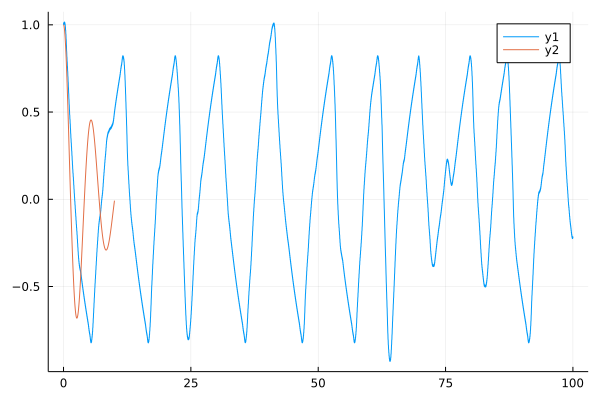

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [363]:
plot(sol_Duffing_2.t,sol_Duffing_2[1,:])
plot!(t_true,sol_Duffing_true[1,:])

## Read Data

In [740]:
file = MAT.matread("measurement_data/measurement_data/noise/cbc_f24_noise_N0/bp1.mat")

Dict{String, Any} with 2 entries:
  ""            => UInt8[0x00 0x01 … 0x00 0x00]
  "branchpoint" => Dict{String, Any}("out_coeffs"=>[0.0 0.2 … 0.0 0.0], "gains"…

In [741]:
file["branchpoint"]

Dict{String, Any} with 11 entries:
  "out_coeffs"     => [0.0 0.2 … 0.0 0.0]
  "gains"          => [1.06667 0.00457143]
  "channels"       => Any["time_ctr" "out" … "base_accn" "time_mod_2pi"]
  "date"           => Dict{String, Any}("s1"=>Int8[77, 67, 79, 83], "arr"=>("",…
  "coeffs"         => [0.0 0.0172759 … -0.000302442 0.0001553]
  "freq"           => 24.0
  "stream"         => [1.05169e8 1.05169e8 … 1.05174e8 1.05174e8; -0.05483 -0.0…
  "Phi"            => 0.2
  "id"             => 1.0
  "forcing_coeffs" => [0.0 0.2 … 0.0 0.0]
  "noise_amp"      => 0.0

In [742]:
file["branchpoint"]["coeffs"][1:16]

16-element Vector{Float64}:
  0.0
  0.017275890335440636
 -0.00046969257527962327
  0.0008941650739870965
  0.00011190890654688701
  0.00011433472536737099
 -0.00011022910621250048
  4.823983181267977e-5
  0.333329439163208
 -0.061709363013505936
  0.003124841256067157
  0.00020675039559137076
  0.0002239306049887091
  8.582184091210365e-5
 -0.00030244217487052083
  0.00015529988741036505

In [743]:
file["branchpoint"]["out_coeffs"][1:16]

16-element Vector{Float64}:
 0.0
 0.20000003278255463
 0.0
 1.2774636170847365e-38
 1.242021275675801e-38
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [744]:
file["branchpoint"]["forcing_coeffs"][1:16]

16-element Vector{Float64}:
 0.0
 0.20000000298023224
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [745]:
file["branchpoint"]["stream"]

9×5000 Matrix{Float64}:
  1.05169e8   1.05169e8   1.05169e8  …   1.05174e8   1.05174e8   1.05174e8
 -0.05483    -0.0490052  -0.0431358     -0.071946   -0.066286   -0.0605658
  0.264511    0.265656    0.265427       0.27092     0.271912    0.271606
 -1.44371    -1.45635    -1.46716       -1.39526    -1.41318    -1.42938
  0.0         0.0         0.0            0.0         0.0         0.0
 -0.0609589  -0.0553131  -0.0494385  …  -0.0778198  -0.0722504  -0.0665283
 -0.0432587  -0.0434113  -0.0434875     -0.0429535  -0.0431824  -0.0432587
  2.38604     2.26581     2.05207        2.16117     1.92664     1.71365
  6.03564     6.0658      6.09596        5.94537     5.97553     6.00569

In [749]:
findmax(transpose(file["branchpoint"]["stream"][3,:]))[1] -findmin(transpose(file["branchpoint"]["stream"][3,:]))[1]

0.1505279541015625

In [787]:
findmax(transpose(file["branchpoint"]["stream"][3,:]))[1]

0.410614013671875

In [730]:
phi_list = []
amlitude_list = []
for i in 1:54
    file2 = MAT.matread("measurement_data/measurement_data/noise/cbc_f24_noise_N0/bp$(i).mat")
    out = transpose(file2["branchpoint"]["stream"])[:,3]
    amplitude = findmax(out)[1] - findmin(out)[1]
    print(amplitude)
    append!(amlitude_list,amplitude)
    phi = file2["branchpoint"]["Phi"]
    append!(phi_list,phi)
    #print("$(i) finished!")
    
    
end

0.15052795410156250.1477050781250.18791198730468750.2818298339843750.3929138183593750.49980163574218750.57899475097656250.6507873535156250.71357727050781250.79719543457031250.89500427246093751.00944519042968751.0725402832031251.1238098144531251.1875915527343751.27159118652343751.3795471191406251.4347839355468751.52732849121093751.58821105957031251.67442321777343751.74095153808593751.829528808593751.89689636230468751.9807434082031252.0695495605468752.13783264160156252.22007751464843752.27836608886718752.36534118652343752.43713378906252.5328063964843752.6127624511718752.696228027343752.7845764160156252.85949707031252.93510437011718752.99552917480468753.04862976074218753.1504821777343753.39195251464843753.43444824218753.4779357910156253.53660583496093753.5974121093753.66394042968753.75907897949218753.861389160156253.9518737792968754.0177917480468754.0898132324218754.1688537597656254.22660827636718754.319000244140625

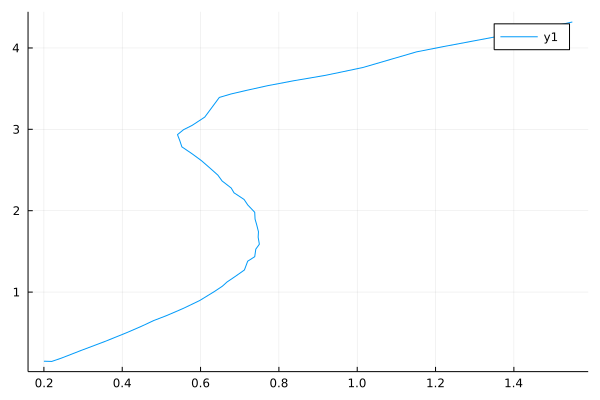

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [698]:
plot(phi_list,amlitude_list)

In [ ]:
function Duffing_2(u,p,t)
    b,alpha_2,mu,v,rho,delta_st,wn_2,Phi,w = p
    x,y = u
    du1 = y
    du2 = -b*y - alpha_2*x - mu*x^3 - v*x^5 - rho*x^7 + delta_st * wn_2 *Phi * cos(w*t)
    du = [du1,du2]
end

In [ ]:
b,alpha_2,mu,v,rho,delta_st,wn_2,Phi,w = p

In [850]:
initial_1 = [1.0,2.0]
datasize_1 = 10000
timespan_1 = (0.0,5000.0)
t_1 = range(timespan_1[1],timespan_1[2],length=datasize_1)
param_1 = [0.01308,1.0,0.2997,-0.0230,-0.00055,0.7,1000,25.0,round(2*pi*24,digits = 3)]
prob_Duffing = ODEProblem(Duffing,initial_1,timespan_1,param_1)
sol_Duffing = solve(prob_Duffing,Tsit5(),saveat=t_1)


retcode: Success
Interpolation: 1st order linear
t: 10000-element Vector{Float64}:
    0.0
    0.5000500050005
    1.000100010001
    1.5001500150015001
    2.000200020002
    2.5002500250025004
    3.0003000300030003
    3.5003500350035
    4.000400040004
    4.5004500450045
    5.000500050005001
    5.5005500550055
    6.0006000600060005
    ⋮
 4994.499449944995
 4994.999499949995
 4995.499549954996
 4995.999599959996
 4996.499649964997
 4996.999699969997
 4997.499749974998
 4997.999799979998
 4998.499849984999
 4998.999899989999
 4999.499949995
 5000.0
u: 10000-element Vector{Vector{Float64}}:
 [1.0, 2.0]
 [1.5595080040026716, 1.016160921594377]
 [1.1752586471873847, -0.008073223979707222]
 [0.0054247820894739295, -0.24470802323234553]
 [-1.4403615139603556, 0.6283775029499346]
 [-2.633767562453865, 2.477438199650166]
 [-3.0635273840461004, 5.174583599767288]
 [-2.5599868571178037, 7.76064272957089]
 [-1.3377129784829105, 9.599016601268929]
 [0.08162113576230867, 10.309128854351727]

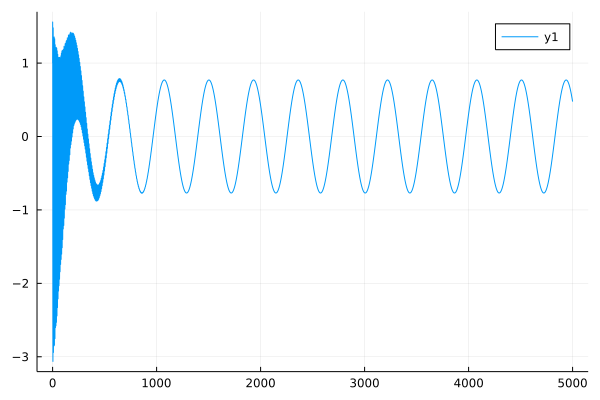

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1xjOTM1MTE2YzljN2I5MWI0ZjI3YmEyYjNjOWY3YzZiNjM5YjMwMmFjXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXGM5MzUxMTZjOWM3YjkxYjRmMjdiYTJiM2M5ZjdjNmI2MzliMzAyYWNcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [851]:
plot(sol_Duffing.t,sol_Duffing[1,:])